### Comparing different MLP Configurations on SVHN dataset

In [1]:
from layers import load_data, LogisticRegression, HiddenLayer, MLP, myMLP, test_mlp

"""
This code is based on
[1] http://deeplearning.net/tutorial/logreg.html
[2] http://deeplearning.net/tutorial/mlp.html
"""

from __future__ import print_function

__docformat__ = 'restructedtext en'


import os
import sys
import timeit

import numpy
import scipy.io

import theano
import theano.tensor as T
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

Using gpu device 0: GRID K520 (CNMeM is disabled, cuDNN Version is too old. Update to v5, was 3007.)


### Bullet 2: Comparison between _tanh_ and _softmax_

In [10]:
results=test_mlp(learning_rate=0.01, L1_reg=0.00, L2_reg=0.0001, n_epochs=1000,batch_size=20,
                 n_hidden=500,n_hiddenLayers=2,activation=T.tanh,patience=10000, verbose=True)
print (('test accuracy for tanh activation function: %f %%') % ((1-results[1])*100.)) 
results=test_mlp(learning_rate=0.01, L1_reg=0.00, L2_reg=0.0001, n_epochs=1000,batch_size=20, n_hidden=500,n_hiddenLayers=2,
                 activation=T.nnet.softmax,patience=10000, verbose=True)

print (('test accuracy for softmax activation function: %f %%') % ((1-results[1])*100.))

... loading data
... building the model
... training
epoch 1, minibatch 3296/3296, validation error 80.710383 %
     epoch 1, minibatch 3296/3296, test error of best model 79.938509 %
epoch 2, minibatch 3296/3296, validation error 61.543716 %
     epoch 2, minibatch 3296/3296, test error of best model 61.425826 %
epoch 3, minibatch 3296/3296, validation error 49.603825 %
     epoch 3, minibatch 3296/3296, test error of best model 52.252114 %
epoch 4, minibatch 3296/3296, validation error 43.251366 %
     epoch 4, minibatch 3296/3296, test error of best model 45.814758 %
epoch 5, minibatch 3296/3296, validation error 40.218579 %
     epoch 5, minibatch 3296/3296, test error of best model 42.651806 %
epoch 6, minibatch 3296/3296, validation error 38.620219 %
     epoch 6, minibatch 3296/3296, test error of best model 40.518832 %
epoch 7, minibatch 3296/3296, validation error 36.120219 %
     epoch 7, minibatch 3296/3296, test error of best model 38.266718 %
epoch 8, minibatch 3296/3296, 

The code for file __file__ ran for 45.25m


... building the model
... training
epoch 1, minibatch 3296/3296, validation error 81.161202 %
     epoch 1, minibatch 3296/3296, test error of best model 80.415065 %
epoch 2, minibatch 3296/3296, validation error 81.161202 %
epoch 3, minibatch 3296/3296, validation error 81.161202 %
Optimization complete. Best validation score of 81.161202 % obtained at iteration 3296, with test performance 80.415065 %
test accuracy for softmax activation function: 19.584935 %


The code for file __file__ ran for 1.12m


### Comparison
The squared error loss when applied to softmax (or sigmoid) activation layer output have vanishing gradient when the derivative of non linearity is near 0, even if the output is wrong. This is a problem as the parameters might change a little. And this is the reason why the validation error is same in case of softmax activation layers network for every epoch.

### Bullet 3: Experiment with the number of hidden layers

In [11]:
#parameter tunning 
"""
The parameter tunning and the recording the values of test accuracies was done in separate prob_b_3.ipynb file.
This was done for the convenience of changing the parameters again and again.
The output was stored in log.txt file everytime test_mlp was called, whether it be for parameter tunning or 
for storing the test accuracies.
"""

learning_rate=[0.01,0.02,0.03,0.04,0.05]
n_hidden=[400,500,600,700,800]
activation=[T.tanh,T.nnet.softmax,T.nnet.sigmoid ]
patience=[8000,9000,10000,11000]
regularizer_L1=[0.00]
regularizer_L2=[0.001]

best_validation=100
for learning_rt in learning_rate:
    for early_patience in patience:
        for activation_fn in activation:
            for n_hidden_nodes in n_hidden:
                for L1 in regularizer_L1:
                    for L2 in regularizer_L2:
                        results = test_mlp(learning_rate=learning_rt, L1_reg=L1, L2_reg=L2, n_epochs=500,batch_size=60, 
                                           n_hidden=n_hidden_nodes,n_hiddenLayers=3, activation=activation_fn,
                                           patience=early_patience, verbose=True)
                        validation_for_best_model= results[0]
                        s=(('validation error for  %f learning rate, %i n_hidden, %s activation , %i patience, %f L1, %f L2 '
                               'is %f %% \n') % 
                           (learning_rt, n_hidden_nodes, activation_fn,early_patience,L1,L2,validation_for_best_model* 100.))
                        with open("log.txt", "a") as myfile:
                            myfile.write(s)

                        print(('validation error for  %f learning rate, %i n_hidden, %s activation , %i patience, %f L1, %f L2 '
                               'is %f %% \n') %
                              (learning_rt, n_hidden_nodes, activation_fn,early_patience,L1,L2,
                               validation_for_best_model* 100.))
                        if validation_best>validation_for_best_model:
                            validation_best = validation_for_best_model
                            best_learning_rt = learning_rt
                            best_n_hidden = n_hidden_nodes
                            best_activation = activation_fn
                            best_patience = early_patience 
                            best_L1=L1
                            best_L2=L2
                            s=(('validation error minimum upto here for  %f learning rate, %i n_hidden, %s activation , %i patience, %f L1, %f L2 '
                               'is %f %% \n') %
                              (learning_rt, n_hidden_nodes, activation_fn,early_patience,L1,L2,validation_for_best_model* 100.))
                            with open("log.txt", "a") as myfile:
                                myfile.write(s)


s=(('parameter tunning complete....testing for different hidden layers... \n'))
with open("log.txt", "a") as myfile:
    myfile.write(s)
print (('parameter tunning complete....testing for different hidden layers... \n'))
n_hidden_layers=[1,3,5,7]
test_accuracies=[]
for n_hiddenLayers in n_hidden_layers:
    results = test_mlp(learning_rate= best_learning_rt, L1_reg=best_L1, L2_reg=best_L2, n_epochs=1000,batch_size=20, n_hidden=best_n_hidden,n_hiddenLayers=n_hiddenLayers, activation=best_activation,patience=best_patience, verbose=False)
    test_accuracies.append((1-results[1])*100.)
    s=(('test accuracy for %f learning rate, %i hidden layers, %i n_hidden, %s activation , %i patience, %f L1, %f L2 '
        'is %f %% \n' ) % (best_learning_rt, n_hiddenLayers, best_n_hidden, best_activation, best_patience, best_L1, best_L2, (1-results[1])*100.))

    with open("log.txt", "a") as myfile:
        myfile.write(s)
    print (('test accuracy for %f learning rate, %i hidden layers, %i n_hidden, %s activation , %i patience, %f L1, %f L2 '
            'is %f %% \n' ) % (best_learning_rt, n_hiddenLayers, best_n_hidden, best_activation, best_patience, best_L1, best_L2, (1-results[1])*100.))


"""
Taking the values of test accuracies from the log.txt file. As after obtaining the test accuracies in prob_b_3.ipynb code 
It was run on different parameters so the output is lost there but stored in log.txt file.
"""               


# The results of the parameter tunning are saved in the log.txt file.
The parameter tunning is initially done on:
 
    learning_rate=[0.01,0.02,0.03,0.04,0.05]
    n_hidden=[400,500,600,700,800]
    activation=[T.tanh,T.nnet.softmax,T.nnet.sigmoid ]
    patience=[8000,9000,10000,11000]
    regularizer_L1=[0.00]
    regularizer_L2=[0.001]
  
and the model which gave minimum validation error is :
validation error for  0.010000 learning rate, 400 n_hidden, Elemwise{tanh,no_inplace} activation , 10000 patience, 0.000000 L1, 0.001000 L2 is 15.969945 % 

Now, after seeing the results for the above parameters discarding the parameters which are suspected not to give minimum validation error:
    learning_rate=[0.01,0.02]
    n_hidden=[300,350,400,450,500,600]
    activation=[T.tanh]
    patience=[10000,11000]
    regularizer_L1=[0.00,0.0001]
    regularizer_L2=[0.00,0.0001]
 with the following being best till now:
    validation_best=0.15969945
    best_learning_rt = 0.010000
    best_n_hidden = 400
    best_activation = T.tanh
    best_patience = 10000 
    best_L1=0.000000
    best_L2=0.001000
    
After seeing the pattern for learning rate 0.01, it  is clear that the minimum validation error is for L1= 0.0, L2= 0.0001 

so checking on learning rate= 0.2 for these values:
    learning_rate=[0.02]
    n_hidden=[300,350,400,450,500,600]
    activation=[T.tanh]
    patience=[10000,11000]
    regularizer_L1=[0.00]
    regularizer_L2=[0.0001]
    
The minimum validation error after tunning is for :

    validation_best=0.14521858
    best_learning_rt = 0.010000
    best_n_hidden = 500
    best_activation = T.tanh
    best_patience = 10000 
    best_L1=0.000000
    best_L2=0.000100
    
parameter tunning complete....testing for different hidden layers...
test accuracy for 0.010000 learning rate, 1 hidden layers, 500 n_hidden, Elemwise{tanh,no_inplace} activation , 10000 patience, 0.000000 L1, 0.000100 L2 is 78.235972 %
test accuracy for 0.010000 learning rate, 3 hidden layers, 500 n_hidden, Elemwise{tanh,no_inplace} activation , 10000 patience, 0.000000 L1, 0.000100 L2 is 81.172175 %
test accuracy for 0.010000 learning rate, 5 hidden layers, 500 n_hidden, Elemwise{tanh,no_inplace} activation , 10000 patience, 0.000000 L1, 0.000100 L2 is 77.494235 %
test accuracy for 0.010000 learning rate, 7 hidden layers, 500 n_hidden, Elemwise{tanh,no_inplace} activation , 10000 patience, 0.000000 L1, 0.000100 L2 is 77.102229 %


Plot the result (reproducing Figure 1)

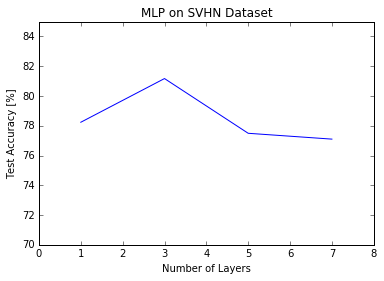

In [24]:
"""
Taking the values of test accuracies from the log.txt file. As after obtaining the test accuracies in prob_b_3.ipynb code 
It was run on different parameters so the output is lost there but stored in log.txt file.
"""

n_hidden_layers=[1,3,5,7]
test_accuracy=[78.235972,81.172175,77.494235,77.102229]
plt.plot(n_hidden_layers, test_accuracy)
plt.ylabel("Test Accuracy [%]")
plt.xlabel("Number of Layers")
plt.ylim([70,85])
plt.xlim([0,8])
plt.title("MLP on SVHN Dataset")


Document the choice of parameters, and discuss what you discover.

validation_best=0.14521858
best_learning_rt = 0.010000
best_n_hidden = 500
best_activation = T.tanh
best_patience = 10000 
best_L1=0.000000
best_L2=0.000100
n_epochs=1000
batch_size=20 

first the parameter tunning is done for which the output is stored in log.txt file and also mentioned in the above
markdown.Tried to do the grid search and picked the model with the minimum validation error.
Then the test accuracies for that model is calculated.

A feedforward network with a single layer is theoretically sufficient to represent any function, however it might be infeasibly large and might fail to learn and generalize well. Thus, it is suggested that we might use deeper models to get betterr learning and generalization. 

The accuracies noted by the network trained on the above parameter increases upto 3 hidden layer network. The model is fine tuned for 3 hidden layers and the deeper model performs better than hidden layer 1 model.
The little decrease in the accuracies for the hidden layer 5 and 7 model may be that since the network was tunned for 3 
hidden layers, so it gave out parameters accordingly. The deeper models should generalise better. But it may be the case here that since after tunning the parameters learning rate came out to be 0.01, which might be very slow for 5/7 hidden layer networks. This may be the reason because the number of neurons have increased. Therefore increasing the number of epochs than 1000 could increase the test accuracies for 5 and 7 hidden layers network (giving it appropriate time to converge as the learning rate is slow).
A support of this argument can be that for activation=T.tanh, n_hidden=500, learning_rate=0.05, patience=10000,n_epochs =1000, L1_reg=0, L2_reg=0.0001,n_hiddenLayers=5
the test accuracy comes out to be 78.255188 %
So the test performance increases by increasing the learning rate.
Therefore increasing the epochs for 0.01 learning rate could give better test accuracies.

Here if n_epochs would have been higher for every netwrok then test accuracies would have been increased with deeper networks.(which I could not do with time constraints)


So In general the deeper layer generalises better.

### Bullet 4: Experiment with the number of hidden layers, but fix the total number of neurons

In [40]:
n_neurons=840 #use best obtained parameters in the parameter tunning above.
n_hiddenLayers=[1,2,3,4,5,6]
test_accuracies=[]
for n_hidden_layers in n_hiddenLayers:
    results = test_mlp(learning_rate=0.01, L1_reg=0.00, L2_reg=0.0001, n_epochs=1000,batch_size=20, 
                       n_hidden=n_neurons/n_hidden_layers,n_hiddenLayers=n_hidden_layers, 
                       activation=T.tanh,patience=10000, verbose=True)
    test_accuracies.append((1-results[1])*100)
    s=(('the validation accuracy is %f %%, for n_hidden_layers %i and the test '
        'accuracy is %f %% \n') % ((1-results[0])*100,n_hidden_layers,(1-results[1])*100))
    with open("log4.txt","a") as myfile:
        myfile.write(s)
        
    print(('the validation accuracy is %f %%, for n_hidden_layers %i and the test '
           'accuracy is %f %% \n') % ((1-results[0])*100,n_hidden_layers,(1-results[1])*100))

... loading data
... building the model
... training
epoch 1, minibatch 3296/3296, validation error 79.494536 %
     epoch 1, minibatch 3296/3296, test error of best model 78.900846 %
epoch 2, minibatch 3296/3296, validation error 71.256831 %
     epoch 2, minibatch 3296/3296, test error of best model 71.591084 %
epoch 3, minibatch 3296/3296, validation error 59.275956 %
     epoch 3, minibatch 3296/3296, test error of best model 60.445811 %
epoch 4, minibatch 3296/3296, validation error 50.642077 %
     epoch 4, minibatch 3296/3296, test error of best model 52.697925 %
epoch 5, minibatch 3296/3296, validation error 43.674863 %
     epoch 5, minibatch 3296/3296, test error of best model 46.606457 %
epoch 6, minibatch 3296/3296, validation error 39.918033 %
     epoch 6, minibatch 3296/3296, test error of best model 42.590315 %
epoch 7, minibatch 3296/3296, validation error 37.336066 %
     epoch 7, minibatch 3296/3296, test error of best model 40.176787 %
epoch 8, minibatch 3296/3296, 

The code for file __file__ ran for 23.83m
The code for file __file__ ran for 34.53m


the validation accuracy is 83.346995 %, for n_hidden_layers 2 and the test accuracy is 81.033820 %
... loading data
... building the model
... training
epoch 1, minibatch 3296/3296, validation error 80.778689 %
     epoch 1, minibatch 3296/3296, test error of best model 79.973098 %
epoch 2, minibatch 3296/3296, validation error 57.377049 %
     epoch 2, minibatch 3296/3296, test error of best model 59.965411 %
epoch 3, minibatch 3296/3296, validation error 44.453552 %
     epoch 3, minibatch 3296/3296, test error of best model 47.190623 %
epoch 4, minibatch 3296/3296, validation error 38.032787 %
     epoch 4, minibatch 3296/3296, test error of best model 41.856264 %
epoch 5, minibatch 3296/3296, validation error 34.890710 %
     epoch 5, minibatch 3296/3296, test error of best model 37.717141 %
epoch 6, minibatch 3296/3296, validation error 33.319672 %
     epoch 6, minibatch 3296/3296, test error of best model 35.203689 %
epoch 7, minibatch 3296/3296, validation error 31.489071 %
  


The code for file __file__ ran for 154.41m


the validation accuracy is 84.713115 %, for n_hidden_layers 3 and the test accuracy is 81.802460 %
... loading data
... building the model
... training
epoch 1, minibatch 3296/3296, validation error 78.196721 %
     epoch 1, minibatch 3296/3296, test error of best model 76.118370 %
epoch 2, minibatch 3296/3296, validation error 55.683060 %
     epoch 2, minibatch 3296/3296, test error of best model 57.544197 %
epoch 3, minibatch 3296/3296, validation error 42.814208 %
     epoch 3, minibatch 3296/3296, test error of best model 45.837817 %
epoch 4, minibatch 3296/3296, validation error 36.844262 %
     epoch 4, minibatch 3296/3296, test error of best model 40.042275 %
epoch 5, minibatch 3296/3296, validation error 32.991803 %
     epoch 5, minibatch 3296/3296, test error of best model 35.338201 %
epoch 6, minibatch 3296/3296, validation error 30.204918 %
     epoch 6, minibatch 3296/3296, test error of best model 32.071483 %
epoch 7, minibatch 3296/3296, validation error 28.005464 %
  


The code for file __file__ ran for 23.24m


the validation accuracy is 82.540984 %, for n_hidden_layers 4 and the test accuracy is 79.903920 %
... loading data
... building the model
... training
epoch 1, minibatch 3296/3296, validation error 74.057377 %
     epoch 1, minibatch 3296/3296, test error of best model 73.435819 %
epoch 2, minibatch 3296/3296, validation error 53.893443 %
     epoch 2, minibatch 3296/3296, test error of best model 55.776326 %
epoch 3, minibatch 3296/3296, validation error 45.040984 %
     epoch 3, minibatch 3296/3296, test error of best model 47.609531 %
epoch 4, minibatch 3296/3296, validation error 38.702186 %
     epoch 4, minibatch 3296/3296, test error of best model 41.487317 %
epoch 5, minibatch 3296/3296, validation error 35.300546 %
     epoch 5, minibatch 3296/3296, test error of best model 37.955419 %
epoch 6, minibatch 3296/3296, validation error 32.773224 %
     epoch 6, minibatch 3296/3296, test error of best model 34.550346 %
epoch 7, minibatch 3296/3296, validation error 31.079235 %
  


The code for file __file__ ran for 9.01m


the validation accuracy is 80.150273 %, for n_hidden_layers 5 and the test accuracy is 78.474251 %
... loading data
... building the model
... training
epoch 1, minibatch 3296/3296, validation error 75.177596 %
     epoch 1, minibatch 3296/3296, test error of best model 74.558032 %
epoch 2, minibatch 3296/3296, validation error 56.366120 %
     epoch 2, minibatch 3296/3296, test error of best model 57.732513 %
epoch 3, minibatch 3296/3296, validation error 43.360656 %
     epoch 3, minibatch 3296/3296, test error of best model 45.876249 %
epoch 4, minibatch 3296/3296, validation error 37.923497 %
     epoch 4, minibatch 3296/3296, test error of best model 40.099923 %
epoch 5, minibatch 3296/3296, validation error 33.565574 %
     epoch 5, minibatch 3296/3296, test error of best model 35.960799 %
epoch 6, minibatch 3296/3296, validation error 32.185792 %
     epoch 6, minibatch 3296/3296, test error of best model 33.462721 %
epoch 7, minibatch 3296/3296, validation error 30.614754 %
  


The code for file __file__ ran for 56.16m


the validation accuracy is 81.445355 %, for n_hidden_layers 6 and the test accuracy is 77.746349 %


Plot the result (reproducing Figure 2)

In [41]:
print ((test_accuracies))

[75.188317, 81.03382, 81.80246, 79.90392, 78.474251, 77.746349]


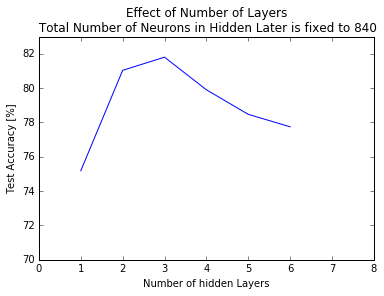

In [44]:

plt.plot(n_hiddenLayers, test_accuracies)
plt.ylabel("Test Accuracy [%]")
plt.xlabel("Number of hidden Layers")
plt.ylim([70,83])
plt.xlim([0,8])
plt.title("Effect of Number of Layers\n Total Number of Neurons in Hidden Later is fixed to 840")




Document the choice of parameters, and discuss what you discover.

n_neurons=840 #use best obtained parameters in the parameter tunning above.
n_hiddenLayers=[1,2,3,4,5,6]
validation_best=0.14521858
best_learning_rt = 0.010000
best_activation = T.tanh
best_patience = 10000 
best_L1=0.000000
best_L2=0.000100
n_epochs= 1000

The results are stored in the log4.txt file.
The test accuracies increases upto network with 3 hidden layers. The number of neurons is the same, but however the number
of weights to be learned increases as the network becomes deeper.
The parameters are tunned for 3 hidden layer network and here the neurons remain the same so neurons per hidden layer 
decreases with deeper networks. This might become a problem for the network to generalise.
A feedforward network with a single layer is theoretically sufficient to represent any function, however it might be 
infeasibly large and might fail to learn and generalize well. Thus, it is suggested that we might use deeper 
models to get betterr learning and generalization. 

So this is like a trade off between the deeper network and number of neurons in each layer.The network generalises better
from previous upto where the number of neurons are sufficient generalise. Therefore performance will increase upto certain point and start to decrease.


### Bullet 5: Experiment with the number of neurons in hidden layers, but fix the number of hidden layers

In [50]:
n_neurons=[20,200,400,500,700,1000,1200,]
test_accuracies=[]

for n_hidden_neurons in n_neurons:
    results=test_mlp(learning_rate=0.01, L1_reg=0.00, L2_reg=0.0001, n_epochs=1000,batch_size=20, 
                       n_hidden=n_hidden_neurons,n_hiddenLayers=1, activation=T.tanh,patience=10000, verbose=True)
    test_accuracies.append((1-results[1])*100)
    s=(('the validation accuracy is %f %%, for n_neurons %i and the test '
           'accuracy is %f %% \n') % ((1-results[0])*100,n_hidden_neurons,(1-results[1])*100))
    with open("log5.txt","a") as myfile:
        myfile.write(s)    
    print(('the validation accuracy is %f %%, for n_neurons %i and the test '
           'accuracy is %f %% \n') % ((1-results[0])*100,n_hidden_neurons,(1-results[1])*100))

... loading data
... building the model
... training
epoch 1, minibatch 3296/3296, validation error 81.161202 %
     epoch 1, minibatch 3296/3296, test error of best model 80.415065 %
epoch 2, minibatch 3296/3296, validation error 80.942623 %
     epoch 2, minibatch 3296/3296, test error of best model 80.180630 %
epoch 3, minibatch 3296/3296, validation error 65.806011 %
     epoch 3, minibatch 3296/3296, test error of best model 64.865488 %
epoch 4, minibatch 3296/3296, validation error 58.442623 %
     epoch 4, minibatch 3296/3296, test error of best model 58.643351 %
epoch 5, minibatch 3296/3296, validation error 53.292350 %
     epoch 5, minibatch 3296/3296, test error of best model 54.438893 %
epoch 6, minibatch 3296/3296, validation error 49.125683 %
     epoch 6, minibatch 3296/3296, test error of best model 50.960799 %
epoch 7, minibatch 3296/3296, validation error 46.325137 %
     epoch 7, minibatch 3296/3296, test error of best model 48.662567 %
epoch 8, minibatch 3296/3296, 

The code for file __file__ ran for 4.37m
The code for file __file__ ran for 24.98m


the validation accuracy is 81.311475 %, for n_neurons 200 and the test accuracy is 79.581091 %
... loading data
... building the model
... training
epoch 1, minibatch 3296/3296, validation error 80.614754 %
     epoch 1, minibatch 3296/3296, test error of best model 79.919293 %
epoch 2, minibatch 3296/3296, validation error 69.521858 %
     epoch 2, minibatch 3296/3296, test error of best model 69.515757 %
epoch 3, minibatch 3296/3296, validation error 56.653005 %
     epoch 3, minibatch 3296/3296, test error of best model 58.174481 %
epoch 4, minibatch 3296/3296, validation error 47.636612 %
     epoch 4, minibatch 3296/3296, test error of best model 49.903920 %
epoch 5, minibatch 3296/3296, validation error 41.407104 %
     epoch 5, minibatch 3296/3296, test error of best model 44.177556 %
epoch 6, minibatch 3296/3296, validation error 38.032787 %
     epoch 6, minibatch 3296/3296, test error of best model 40.933897 %
epoch 7, minibatch 3296/3296, validation error 35.696721 %
     e

The code for file __file__ ran for 27.45m


... building the model
... training
epoch 1, minibatch 3296/3296, validation error 80.314208 %
     epoch 1, minibatch 3296/3296, test error of best model 79.604151 %
epoch 2, minibatch 3296/3296, validation error 69.767760 %
     epoch 2, minibatch 3296/3296, test error of best model 70.007686 %
epoch 3, minibatch 3296/3296, validation error 58.333333 %
     epoch 3, minibatch 3296/3296, test error of best model 59.926979 %
epoch 4, minibatch 3296/3296, validation error 49.672131 %
     epoch 4, minibatch 3296/3296, test error of best model 51.863951 %
epoch 5, minibatch 3296/3296, validation error 43.101093 %
     epoch 5, minibatch 3296/3296, test error of best model 46.102998 %
epoch 6, minibatch 3296/3296, validation error 39.371585 %
     epoch 6, minibatch 3296/3296, test error of best model 42.305919 %
epoch 7, minibatch 3296/3296, validation error 37.076503 %
     epoch 7, minibatch 3296/3296, test error of best model 39.796311 %
epoch 8, minibatch 3296/3296, validation error 

The code for file __file__ ran for 40.98m


... loading data
... building the model
... training
epoch 1, minibatch 3296/3296, validation error 79.931694 %
     epoch 1, minibatch 3296/3296, test error of best model 79.131437 %
epoch 2, minibatch 3296/3296, validation error 69.426230 %
     epoch 2, minibatch 3296/3296, test error of best model 69.542659 %
epoch 3, minibatch 3296/3296, validation error 58.401639 %
     epoch 3, minibatch 3296/3296, test error of best model 60.099923 %
epoch 4, minibatch 3296/3296, validation error 50.683060 %
     epoch 4, minibatch 3296/3296, test error of best model 52.417371 %
epoch 5, minibatch 3296/3296, validation error 44.098361 %
     epoch 5, minibatch 3296/3296, test error of best model 46.752498 %
epoch 6, minibatch 3296/3296, validation error 39.890710 %
     epoch 6, minibatch 3296/3296, test error of best model 42.524981 %
epoch 7, minibatch 3296/3296, validation error 37.718579 %
     epoch 7, minibatch 3296/3296, test error of best model 40.330515 %
epoch 8, minibatch 3296/3296, 

The code for file __file__ ran for 22.97m


... building the model
... training
epoch 1, minibatch 3296/3296, validation error 79.289617 %
     epoch 1, minibatch 3296/3296, test error of best model 78.785550 %
epoch 2, minibatch 3296/3296, validation error 70.846995 %
     epoch 2, minibatch 3296/3296, test error of best model 71.129900 %
epoch 3, minibatch 3296/3296, validation error 59.262295 %
     epoch 3, minibatch 3296/3296, test error of best model 60.568793 %
epoch 4, minibatch 3296/3296, validation error 52.718579 %
     epoch 4, minibatch 3296/3296, test error of best model 53.908532 %
epoch 5, minibatch 3296/3296, validation error 45.314208 %
     epoch 5, minibatch 3296/3296, test error of best model 47.532667 %
epoch 6, minibatch 3296/3296, validation error 41.625683 %
     epoch 6, minibatch 3296/3296, test error of best model 43.235972 %
epoch 7, minibatch 3296/3296, validation error 39.180328 %
     epoch 7, minibatch 3296/3296, test error of best model 40.676403 %
epoch 8, minibatch 3296/3296, validation error 

The code for file __file__ ran for 45.71m


... loading data
... building the model
... training
epoch 1, minibatch 3296/3296, validation error 78.907104 %
     epoch 1, minibatch 3296/3296, test error of best model 78.497310 %
epoch 2, minibatch 3296/3296, validation error 70.546448 %
     epoch 2, minibatch 3296/3296, test error of best model 70.507302 %
epoch 3, minibatch 3296/3296, validation error 59.713115 %
     epoch 3, minibatch 3296/3296, test error of best model 60.422752 %
epoch 4, minibatch 3296/3296, validation error 51.243169 %
     epoch 4, minibatch 3296/3296, test error of best model 52.943889 %
epoch 5, minibatch 3296/3296, validation error 43.920765 %
     epoch 5, minibatch 3296/3296, test error of best model 46.648732 %
epoch 6, minibatch 3296/3296, validation error 39.494536 %
     epoch 6, minibatch 3296/3296, test error of best model 42.617218 %
epoch 7, minibatch 3296/3296, validation error 36.803279 %
     epoch 7, minibatch 3296/3296, test error of best model 39.903920 %
epoch 8, minibatch 3296/3296, 

The code for file __file__ ran for 91.54m


### Plot the result (reproducing Figure 3)

In [60]:
print ((test_accuracies))

[63.616449, 79.581091, 78.420446, 78.235972, 75.795542, 75.580323, 78.789393]


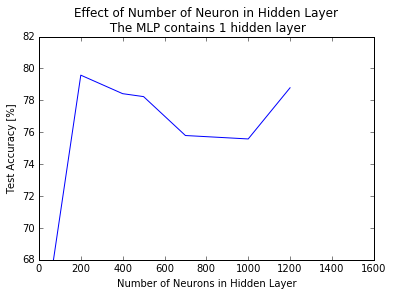

In [61]:
# TODO

plt.plot(n_neurons, test_accuracies)
plt.ylabel("Test Accuracy [%]")
plt.xlabel("Number of Neurons in Hidden Layer")
plt.ylim([68,82])
plt.xlim([0,1600])
plt.title("Effect of Number of Neuron in Hidden Layer\n The MLP contains 1 hidden layer")




### Document the choice of parameters, and discuss what you discover.


n_hidden=[400,500,700,1000,1200] #use best obtained parameters in the parameter tunning above.
n_hiddenLayers=1
best_learning_rt = 0.010000
best_activation = T.tanh
best_patience = 10000 
best_L1=0.000000
best_L2=0.000100
n_epochs= 1000

the output is stored in log5.txt
The test accuracies obtained show that:
The deeper model tend to perform better, but this is not because there arre more parameters or more neurons.
A feedforward network with a single layer is theoretically sufficient to represent any function, however it might be 
infeasibly large and might fail to learn and generalize well. Thus, it is suggested that we might use deeper 
models to get betterr learning and generalization. 


### Implementing MLP(with dropout) with the parameters specified

In [75]:
from layers_1 import load_data, LogisticRegression, DropoutHiddenLayer, test_mlp_dropout

In [76]:
result=test_mlp_dropout(learning_rate=0.01, L1_reg=0.0, L2_reg=0.0001, n_epochs=500,
                        batch_size=20, n_hidden=500, verbose=True, hidlayers=2, acttest=T.tanh, p=0.7)
print (('test accuracy with drop out regularization is %f %%') % ((1-result)*100))

... loading data
... building the model
... training
epoch 1, minibatch 3296/3296, validation error 81.161202 %
     epoch 1, minibatch 3296/3296, test error of best model 80.418909 %
epoch 2, minibatch 3296/3296, validation error 81.051913 %
     epoch 2, minibatch 3296/3296, test error of best model 80.368947 %
epoch 3, minibatch 3296/3296, validation error 80.765027 %
     epoch 3, minibatch 3296/3296, test error of best model 79.992314 %
epoch 4, minibatch 3296/3296, validation error 76.024590 %
     epoch 4, minibatch 3296/3296, test error of best model 75.215219 %
epoch 5, minibatch 3296/3296, validation error 62.855191 %
     epoch 5, minibatch 3296/3296, test error of best model 64.215988 %
epoch 6, minibatch 3296/3296, validation error 56.092896 %
     epoch 6, minibatch 3296/3296, test error of best model 57.386626 %
epoch 7, minibatch 3296/3296, validation error 50.519126 %
     epoch 7, minibatch 3296/3296, test error of best model 51.879324 %
epoch 8, minibatch 3296/3296, 

The code for file __file__ ran for 318.09m


### Problem c: Bullet 2: Implement MLP(without dropout) with the parameters specified

In [80]:
result=test_mlp_dropout(learning_rate=0.01, L1_reg=0.0, L2_reg=0.0001, n_epochs=500,
                        batch_size=20, n_hidden=500, verbose=True, hidlayers=2, acttest=T.tanh, p=1)
print (('test accuracy without drop out regularization is %f %%') % ((1-result)*100))

... loading data
... building the model
... training
epoch 1, minibatch 3296/3296, validation error 81.106557 %
     epoch 1, minibatch 3296/3296, test error of best model 80.330515 %
epoch 2, minibatch 3296/3296, validation error 73.032787 %
     epoch 2, minibatch 3296/3296, test error of best model 72.498078 %
epoch 3, minibatch 3296/3296, validation error 56.953552 %
     epoch 3, minibatch 3296/3296, test error of best model 57.978478 %
epoch 4, minibatch 3296/3296, validation error 46.079235 %
     epoch 4, minibatch 3296/3296, test error of best model 47.413528 %
epoch 5, minibatch 3296/3296, validation error 40.751366 %
     epoch 5, minibatch 3296/3296, test error of best model 42.255957 %
epoch 6, minibatch 3296/3296, validation error 36.243169 %
     epoch 6, minibatch 3296/3296, test error of best model 38.378171 %
epoch 7, minibatch 3296/3296, validation error 33.251366 %
     epoch 7, minibatch 3296/3296, test error of best model 35.872406 %
epoch 8, minibatch 3296/3296, 

The code for file __file__ ran for 37.94m


### Comparing the two cases

The test accuracy for the network with drop out is more than the test accuracy for the without drop out.
In MLP with drop out it regularizes the weights and tries to find the weights of nodes independent of other nodes. It thus
reduce the chances of overfitting and give better results as compared to training without dropout.